Loading dataset:

In [3]:
import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


Dimensions of Data - tarin and test are:

In [4]:
print("Shape of training data:",X_train.shape)
print("Shape of test data:",X_test.shape)

Shape of training data: (50000, 32, 32, 3)
Shape of test data: (10000, 32, 32, 3)


(Width, height, and RGB) are the components of the images.

Preparing the dataset

In [5]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Creating CNN model

In [6]:
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import SGD, Adam

# define cnn model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Training the CNN

In [8]:
history = model.fit(X_train, y_train, batch_size=32, \
                    epochs=15, verbose=2, validation_split=0.2)

Epoch 1/15
1250/1250 - 100s - loss: 1.5253 - accuracy: 0.4508 - val_loss: 1.2446 - val_accuracy: 0.5538 - 100s/epoch - 80ms/step
Epoch 2/15
1250/1250 - 98s - loss: 1.0944 - accuracy: 0.6093 - val_loss: 1.0293 - val_accuracy: 0.6409 - 98s/epoch - 79ms/step
Epoch 3/15
1250/1250 - 98s - loss: 0.8494 - accuracy: 0.6997 - val_loss: 0.9944 - val_accuracy: 0.6606 - 98s/epoch - 78ms/step
Epoch 4/15
1250/1250 - 98s - loss: 0.6390 - accuracy: 0.7749 - val_loss: 1.0232 - val_accuracy: 0.6672 - 98s/epoch - 78ms/step
Epoch 5/15
1250/1250 - 98s - loss: 0.4394 - accuracy: 0.8468 - val_loss: 1.1233 - val_accuracy: 0.6678 - 98s/epoch - 78ms/step
Epoch 6/15
1250/1250 - 98s - loss: 0.2801 - accuracy: 0.9027 - val_loss: 1.3425 - val_accuracy: 0.6651 - 98s/epoch - 78ms/step
Epoch 7/15
1250/1250 - 98s - loss: 0.1929 - accuracy: 0.9339 - val_loss: 1.6645 - val_accuracy: 0.6601 - 98s/epoch - 78ms/step
Epoch 8/15
1250/1250 - 98s - loss: 0.1473 - accuracy: 0.9502 - val_loss: 1.7749 - val_accuracy: 0.6552 - 98s/

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 256)               1605888   
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                        

In [9]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [10]:
import matplotlib.pyplot as plt

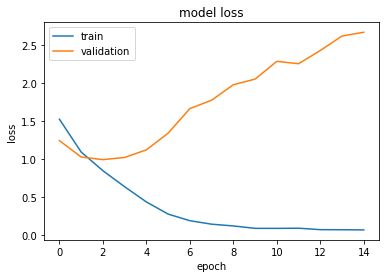

In [11]:
plotLosses(history)


Evaluating the CNN

In [12]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [13]:
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[2.6223580837249756, 0.6488000154495239]


<div style="direction:rtl"> 

    همانطور که مشاهده می‌شود دولایه برای این مدل استفاده شده است.
    ۳۲ فیلتر به این علت که تصاویر ۳۲ در ۳۲ هستند و سایز کرنل را هم ۳ در نظر گرفتیم به علت
    رنگی بودن آن RGB.
    
    ReLU activation function

    از این معماری استفاده شده است
    چرا که بسیار نزدیک به VGG است و می‌دانیم این معماری برای تصاویر با رزولوشن پایین و زمانی که رنگ داریم بسیار خوب جواب می‌دهد.



</div>